In [1]:
import os
os.chdir(os.path.expanduser('/home/lei/Documents/RedunMin/src'))
os.chdir(os.path.expanduser('/home/lei/Documents/RedunMin/data'))
from src.utils import SSv2

In [2]:
path = [f'ssv2/shard_{i:06d}.tar' for i in range(4)]
dm = SSv2(64, False, 10, 'ssv2')
dm.prepare_data()
dm.setup('train')

In [3]:
dl = dm.train_dataloader()

In [4]:
%%time
from tqdm import tqdm
for x in tqdm(dl):
    pass

0it [00:00, ?it/s]/home/lei/miniconda3/envs/RedunMin/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
51it [01:19,  1.55s/it]

KeyboardInterrupt



In [4]:
%%time
out = next(iter(dl))

/home/lei/miniconda3/envs/RedunMin/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


CPU times: user 13 s, sys: 1.23 s, total: 14.2 s
Wall time: 5.73 s


In [7]:
out = dm.transfer_batch_to_device(out, 'cuda', 0)
out = dm.on_after_batch_transfer(out, 0)
out = dm.transfer_batch_to_device(out, 'cpu', 0)

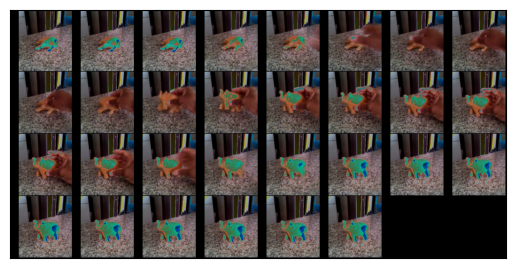

In [15]:
import numpy as np
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

show(make_grid(out[-1][5]))

In [16]:
out[1][2]

tensor(9)